# Trabajo Semanal N°3
### Alumno: Magdalena Guida


Se busca simular el comportamiento de un digitalizador, al ingresarle una señal senoidal contaminada con un nivel de ruido. Definimos ciertos parametros a ajustar: 
 
 - $B$ : cantidad de bits del ADC
 - $f_s$ : frecuencia de muestreo = $ f_s = \frac{1}{t_s}$
 - $ff$ : frecuencia de la señal senoidal
 - $k_n$ : Escala de la potencia del ruido analogico

Para ver resultados, se grafican 3 tipos de funciones:
1) *Amplitud vs tiempo* de: señal analogica sin ruido, señal analogica con ruido y señal con ruido cuantizada
2) *ESPECTRO*: dB vs frecuencias.
3) *HISTOGRAMA*

El objetivo es, variar los distintos parametros con el fin de encontrar relaciones entre estos cambios y las respuestas que brindan los graficos.  

Se muestra a continuacion el codigo utlizado para generar los graficos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def mi_funcion_sen (vmax, dc, ff, ph, N, fs):
    
    ts = 1/fs 
    tt=np.linspace (0, (N-1)*ts, N) # se crea un vector de tiempo con N puntos

    # se genera la señal senoidal con la formula: x(t) = DC + Vmax*sen(2pift + fase)
    xx= dc + vmax*np.sin(2*np.pi*ff*tt + ph)

    return tt, xx #devuelve vector tiempo y vector posicion

tt, xx = mi_funcion_sen(1.4, 0, 1, 0, 1000, 1000) # amp, dc, frec, N, fs
# Se normaliza 
xn=xx/np.std(xx)  

Primer paso del codigo, donde se define una funcion senoidal de entrada desde la ecuacion $ x(t) = DC + V_{max}*sen(2\pi*frec + fase) $. Se le ingresan los parametros definidos en la primer linea, y devuelve los vectores $tt$, vector de tiempo y $xx$, vector de posicion. Luego, se normaliza y se obtiene $xn$, sin importar el valor ingresado para $V_{max}$, esta señal tendra siempre **RMS**= 1.

In [2]:
#----------------------------------- Datos de la simulación---------------------------

fs =  1000 
N = 1000 # cantidad de muestras

ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

# Datos del ADC
B = 4 # bits --> [4,8,16]
Vf = 2 # rango simétrico de +/- Vf Volts, (Vtotal= 2*Vf)


En este bloque, se definen parametros. Notar que para $B$ :cantidad de bits, esta definido como $4$, para un caso especifico de las pruebas. En realidad, tomo los valores de $B = [4, 8, 16 ]$, dependiendo de cada caso. En los graficos se especifica el valor de $B$ utilizado.

In [3]:
#--------------------------------------POTENCIA-----------------------------------

q = 2*Vf/(2**B) # paso de cuantización 
pot_ruido_cuant = q**2/12 
kn = 1 # --> [1, 1/10, 10]
pot_ruido_analog = pot_ruido_cuant * kn 


Aqui se determinan variables relacionadas con la potencia. $q$ : pasos de cuantizacion es el valor que determina el voltaje para cada nivel de cuantizacion, para calcularlo se divide el $V_{total}$ sobre el numero total de niveles de cuantizacion $L$, que esta dado por $2^B$. La variable pot_ruido_cuant representa a la varianza al cuadrado, $σ^2$, que se calcula con una integral que da como resultado $σ^2 = \frac{q^2}{12}$.   $K_n$ es la escala de potencia del ruido analogico, en este caso toma el valor uno, pero para las distintas pruebas varia entre $K_n = [1, 1/10, 10]$. Por ultimo, la potencia del ruido analogico se determina por la multiplicacion de ruido analogico con el potenciador. 

In [4]:
# ------------------------------ DEFINICION DE SEÑALES  -------------------------------------------

nn=np.random.normal(0,np.sqrt(pot_ruido_analog),N) #señal de ruido analogico
analog_sig = xn # señal analógica sin ruido
sr = xn + nn # señal analógica de entrada al ADC (con ruido analógico)
srq = np.round(sr/q)*q
nq =  srq-sr # error de cuantizacion 


En este bloque de codigo se definen las señales a utilizar. $nn$ es el ruido analogico determinado por una distribucion Gaussiana, donde se define al desvio estandar como la raiz de la potencia, para asi, obtener la potencia de ruido definida.  $sr$ que es la señal que ingresa al ADC, la suma entre la senoidal normalizada y el ruido, $srq$ que es la cuantizacion de la señal $sr$. Para obtenerla, se redondea el valor de la señal dividida sobre el paso de cuantizacion, y luego se lo vuelve a multiplicar por $q$ para que retome su escala riginal y $nq$ es la diferencia entre la señal NO cuantizada $sr$ y la señal cuantizada $srq$, la señal de error del cuantizador. 

Terminada la etapa de especificaciones, se comienza con los graficos. 

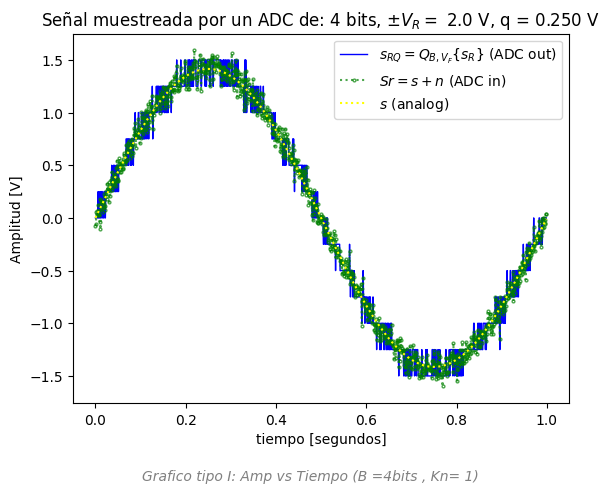

In [5]:
# --------------------------------GRAF (1) =  AMPLITUD vs TIEMPO ---------------------------------

plt.figure()

plt.plot(tt, srq, lw=1, color='blue', label='$ s_{RQ} = Q_{B,V_F}\{s_R\}$ (ADC out)')
plt.plot(tt, sr, color='g',alpha= 0.7, ls='dotted',marker='o',markerfacecolor='none',markeredgecolor='g',markersize=2, label='$ Sr= s + n $ (ADC in)')
plt.plot(tt, xn, color='yellow', ls='dotted', label='$s$ (analog)')

plt.title('Señal muestreada por un ADC de: {:d} bits, $\pm V_R= $ {:3.1f} V, q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.figtext(0.5, -0.05, 'Grafico tipo I: Amp vs Tiempo (B ={:d}bits , Kn= {}) '.format(B,kn), wrap=True, horizontalalignment='center', fontsize=10,style='italic', color='gray')
axes_hdl = plt.gca()
axes_hdl.legend()


En el Grafico I, se observan $srq$, $sr$ y $s$, la senoidal normalizada (llamada xn en el codigo), en el tiempo, para un determinado $B$ y $Kn$. 

Para el analisis y comparacion de los distintos Graficos obtenidos a partir de la variacion de los valores de tanto $B$ como $K_n$, se introduce el factor de relacion señal a ruido, o SNR, por sus siglas en ingles. Es un valor que mide 'que tan fuerte' es la señal en comparacion con su ruido, se busca, obtener el mayor valor posible de SNR, ya que esto significa una diferencia mas grande entre la potencia de la señal y la del ruido. Se define con la siguiente ecuacion (se le agrega funcion logaritmica para poder usarla en dB): 
SNR = $10*log_{10}(\frac{σ_x^2}{σ_e^2})$, donde $σ_x^2$ representa la potencia de la señal, y para este caso, en que se esta usando una señal senoidal se lo define como $σ_x^2=\frac{A}{\sqrt{2}}$, siendo A la amplitud de la señal. $σ_e^2$ es la potencia del ruido, y se calcula como $σ_e^2 = \frac{V_{fl}*K_n}{12*2^{2B}}$. 
Observando la ecuacion podemos analizar el rol de $B$, en donde su aumento significa un aumento exponencial para el argumento del logarito, lo que tambien aumenta directamente al valor de SNR. Por otro lado, a $K_n$ se lo puede ver en el denominador, por lo que su crecimiento es proporcional al decrecimiento del argumneto, y eso se refleja en un menor resultado para el SNR. 

Todos los graficos fueron repetidos para cada uno de los distintos valores de $B$ y $Kn$, mencionados anteriormente. Solo se visualizan algunos para resaltar ciertas caracteristicas. Igualmente, se agrega una Tabla donde se visualiza el SNR para los distints valores de $K_n$ y $B$, donde se puede apreciar los aspectos mencionados anteriormente de como cada variable influye sobre la relacion potencia señal-potencia ruido. 

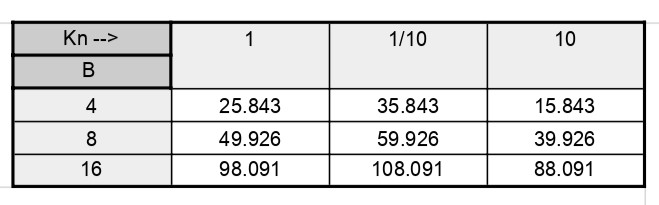

In [6]:
from IPython.display import Image
Image(filename ='C:/Users/magui/APS/TS3/TS3 graf/SNR vs Kn y B.jpg' )

Los valores de $K_n = [1, 1/10, 10]$, minimizan al SNR en 10 dB, mientras el parametro, disminuye en 'divido por 10'. Mientras que el cambio en $B=[4, 8, 16]$ significa para el SNR un paso de 6dB por cada aumento de bit. Donde desde el aumento de 4 a 8 bits, el SNR aumenta en un $4*6=24$bits, y se ve entre la diferencia de 49 y 25, para el salto de 8 a 16 bits, se aumenta en un $8*6=48$dB, como se ve entre 108 y 59.9.  

Se agrega como referencia, un cuadro de rangos de calidad para señales de audio. En la primer columna esta el rango de SNR en dB, luego el nombre, y por ultimo una pequeña caracteristica. 

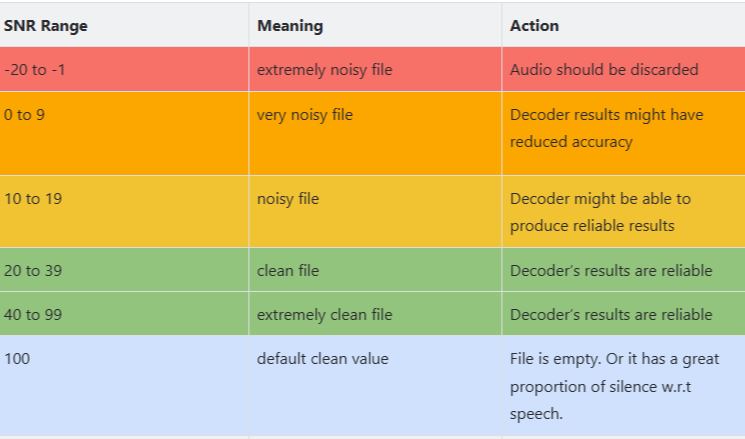

In [7]:
from IPython.display import Image
Image(filename='C:/Users/magui/OneDrive/Imágenes/Capturas de pantalla/Captura de pantalla (51).png')

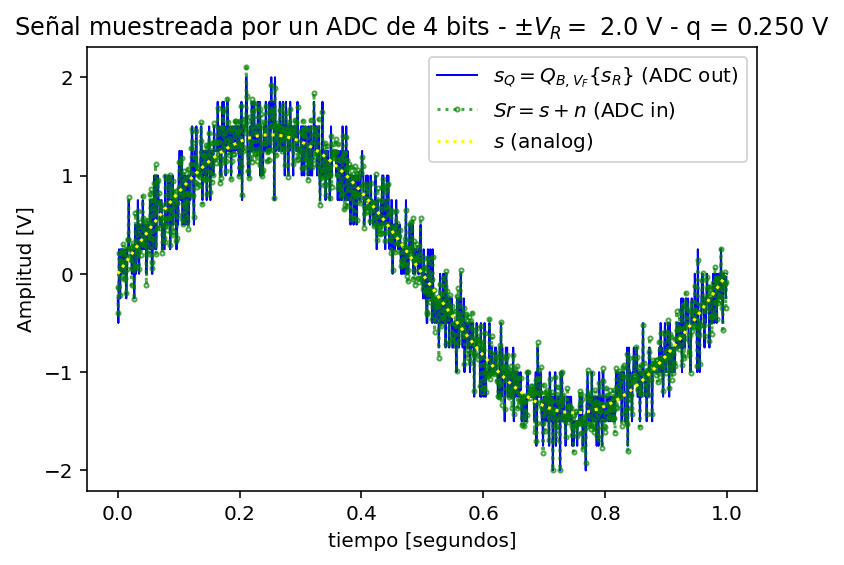

In [8]:
from IPython.display import Image
Image(filename='C:/Users/magui/APS/TS3/TS3 graf/K=10 - B=4 (a).jpg' )


En el Grafico que se ve arriba, que tiene un $B=4$ y $K_n=10$, se aprecia a simple vista como las señales sr y la misma señal cuantizada sq, ocupan un rango mas extenso de valores, esto se debe al incremento de la escala de potencia de ruido. Tambien, se ve reflejado en el valor de su SNR, donde para una misma señal, se le aumenta el valor de potencia de ruido, y resulta en un SNR=15.843. Este valor, segun la referencia, representa una 'muestra ruidosa'. 

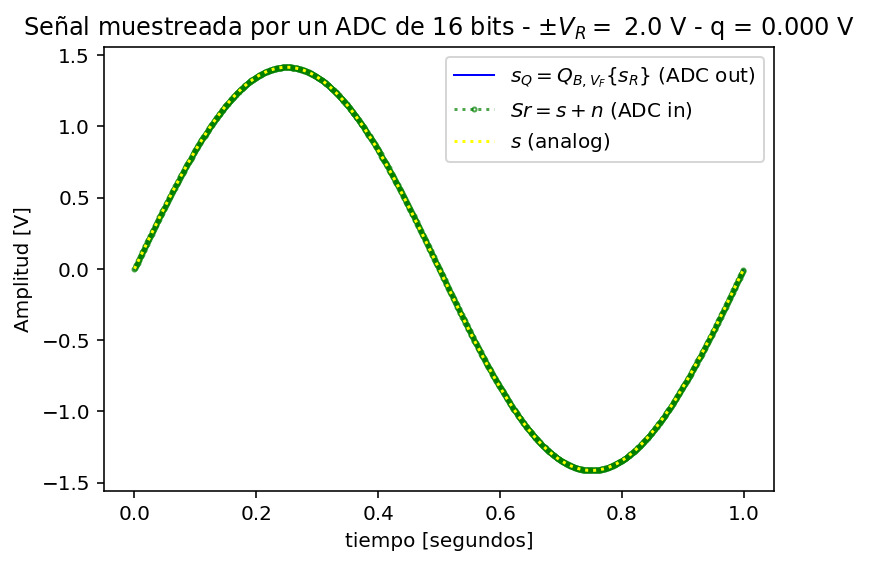

In [9]:
from IPython.display import Image
Image(filename='C:/Users/magui/APS/TS3/TS3 graf/K=110 - B=16 (a).jpg')

Este grafico con el mayor valor de SNR=108.091. La combinacion entre la mayor cantidad de bits y el menor $K_n$ brindan una potencia de ruido totalmente imperceptible, y se la califica como una 'muestra extremadamente limpia'. Igualmente, no considerario necesario una cantidad de bits tan elevada cuando la escala de potencia es tan chica, que con solo 4 bits, se obtiene un SNR=35.843, que ya se lo considera 'aceptable'. 

Para los segundos tipos de graficos, tenemos el espectro, para obtenerlo, se transforma las señales desde su dominio en el tiempo a su dominio en frecuencia, para eso, se usa la funcion $np.fft.fft$. Se declara la variable $ff$ que genera un vector con $f_s - 1$ frecuencias, separadas cada N espacios. Despues, se declara un filtro booleano, que solo admite las frecuencias menores a la mitad de la frecuencia de sampleo $f_s$ , para que se cumpla el Teorema de Sampleo de Nyquist. Antes de las declaraciones de grafico, se definen, Nnq_mean y nNn_mean, las cuales toman su valor desde una funcion que toma promedios, en este caso, del modulo al cuadrado de las transformadas del ruido analgico $Nn$ y del ruido cuantizado $Nq$. 
Estos graficos, brindan informacion de como se distribuye la energia de la señal en funcion del valor que toma su frecuencia.

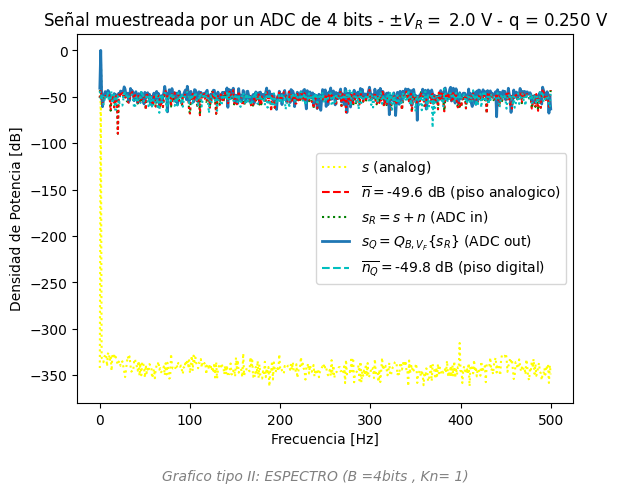

In [10]:
# -----------------------------------------GRAF (2) = ESPECTRO -------------------------------------
plt.figure()
 
ft_SR = 1/N*np.fft.fft( sr)          #sr: analogica con ruido 
ft_Srq = 1/N*np.fft.fft( srq)        #srq: cuantizada
ft_As = 1/N*np.fft.fft( analog_sig)  #As: senoidal limpia
ft_Nq = 1/N*np.fft.fft( nq)          #Nq: ruido cuantizado= sr-srq
ft_Nn = 1/N*np.fft.fft( nn)          #Nn: ruido analogico 

# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N)   #vector de frecs desde 0 hasta fs-1 (en este caso pq N=fs) 

bfrec = ff <= fs/2    #bfrec: filtro booleano que te deja solo las frecs hasta fs/2 = frc de nyquist
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
nNn_mean = np.mean(np.abs(ft_Nn)**2)

plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='yellow', ls='dotted', label='$ s $ (analog)' )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analogico)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $ (ADC in)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\}$ (ADC out)' )

plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.figtext(0.5, -0.05, 'Grafico tipo II: ESPECTRO (B ={:d}bits , Kn= {}) '.format(B,kn), wrap=True, horizontalalignment='center', fontsize=10,style='italic', color='gray')
axes_hdl = plt.gca()
axes_hdl.legend()


El grafico de Espectro para $K_n=1$, $B=4$ y de frecuencia definida como $ff= 1Hz$, se nota como para la señal analogica pura (amarilla), toda la energia esta concentrada para el valor de frecuencia que se le dio, mientras que para las demas, decrece ampliamente. Para las señales con el ruido ya integrado, tanto cuantizada como no, sr (verde) y sq (azul), tambien se ve un pico para $f = 1Hz$, pero por la influencia del ruido si hay energia en los demas valores de frecuencia de aproximadamente -50dB. El valor de las potencias de ruido analogico (rojo) y el ruido digital (celeste), salen de las transformadas de ambos ruidos. Lo que podemos analizar en este grafico, es la comparacion entre ellos, donde, el piso analogico es levente mayor al piso de ruido digital, y eso es lo que se busca para un digitalizador, porque, significa que el valor del piso digital esta determinado mayormente por el piso analogico, el ADC captura toda la señal con detalles y el rango dinamico esta seindo totalmente aprovechado.  

Lo que se busca, es la mayor diferencia posible entre la potencia de la señal y el ruido, como la señal esta normalizada, su valor de potencia es 1W que se traduce como 0dB, al que llega en el pico, como se resalto antes. Entonces, menor sean los pisos de ruidos, mejor sera el rendimiento del ADC. La variable $B$, que en este caso, aumnta el numero de bits, 'mejora' el ADC, bajara el valor del piso del ruido. Para el caso de $K_n$, como solo afecta al ruido analogico, representara cambios significativos para el piso de ruido analogico n (rojo).

Se puede ver a continuacin, un grafico en donde $K_n=1$ y se aumenta $B$ hasta 16 bits, se observa como la diferencia entre el pico de $f=1Hz$, que llega a los 0 dB y la potencia del ruido aumenta, ya que este esta en un valor aproximado de -122 dB. Claramente el aumento de bits mejora la calidad del ADC.

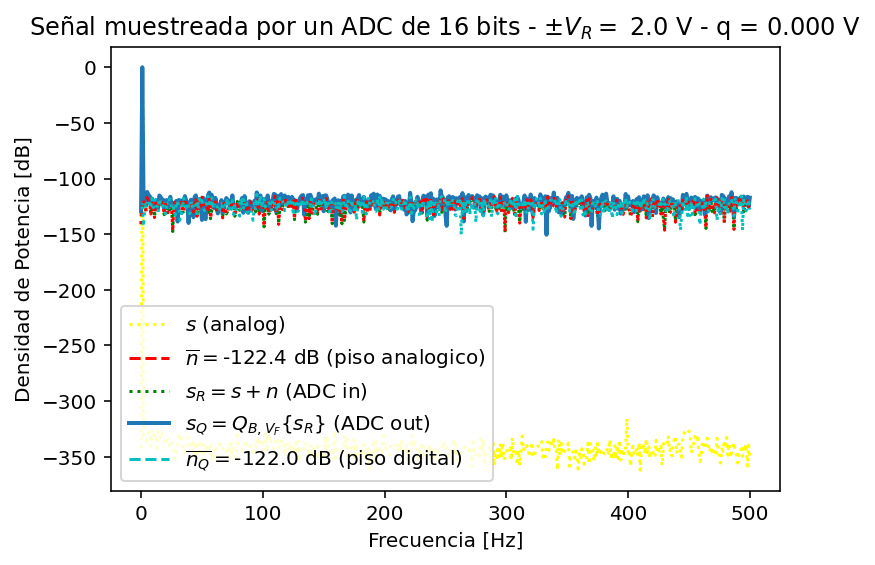

In [11]:
from IPython.display import Image
Image(filename='C:/Users/magui/APS/TS3/TS3 graf/K=1 - B=16 (espect).jpg')

El siguiente grafico es para los valores de $K_n= 1/10$ y $B=4$.

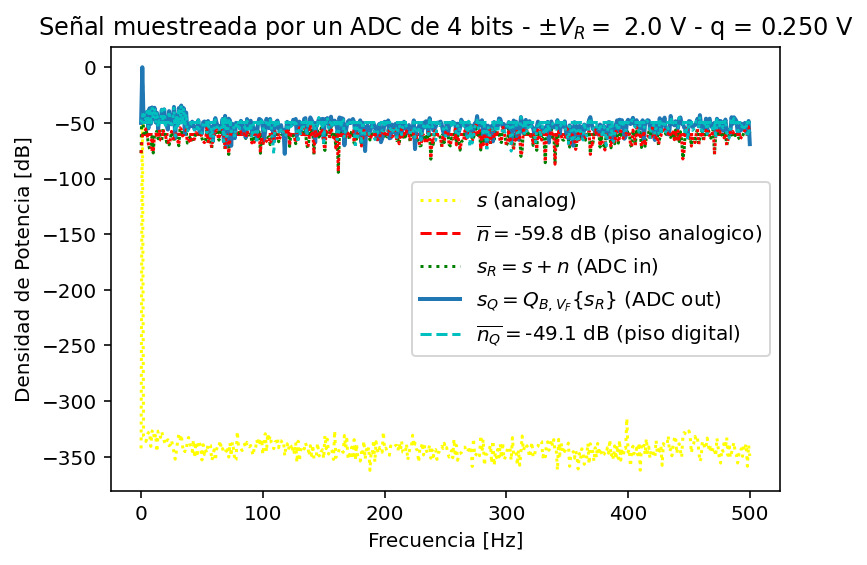

In [12]:
from IPython.display import Image
Image(filename='C:/Users/magui/APS/TS3/TS3 graf/K=110 - B=4 (espect).jpg')

Text(0.5, -0.05, 'Grafico III: HISTOGRAMA (B =4bits , Kn= 1)')

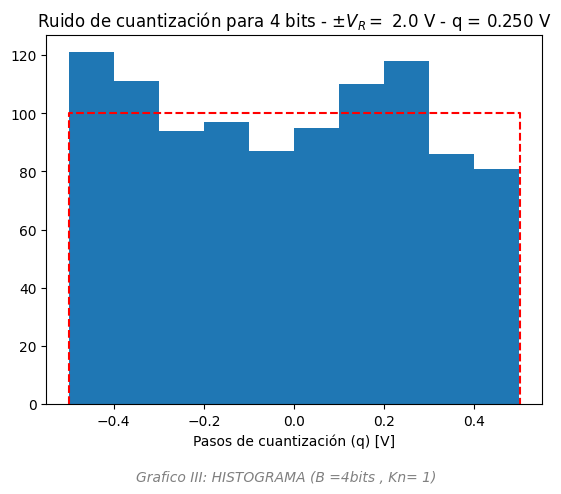

In [13]:

# --------------------------------------GRAF (3) = HISTOGRAMA--------------------------------------

plt.figure(3)
bins = 10            
plt.hist(nq.flatten()/(q), bins=bins)
plt.plot( np.array([-1/2, -1/2, 1/2, 1/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))
plt.xlabel('Pasos de cuantización (q) [V]')
plt.figtext(0.5, -0.05, 'Grafico III: HISTOGRAMA (B ={:d}bits , Kn= {})'.format(B,kn), wrap=True, horizontalalignment='center', fontsize=10,style='italic', color='gray')


Para el tercer tipo de grafico, se usa la funcion para graficar el histograma, que muestra como se distribuye el error de cuantizacion sobre los pasos de cuantizacion. La variable bins, define en cuantos grupos se divide q. 